<a href="https://colab.research.google.com/github/Faseeh56/fake_news_detection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries (if not already installed)
!pip install nltk

# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load datasets
fake = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake.csv")
real = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/True.csv")

# Add labels
fake["label"] = 0
real["label"] = 1

# Combine and shuffle
df = pd.concat([fake, real], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

# We'll use only the text column for classification
df = df[["text", "label"]]
df.head()


,text,label
0,WASHINGTON (Reuters) - Two senior senators ask...,1
1,,0
2,WASHINGTON (Reuters) - The pomp and circumstan...,1
3,SEOUL (Reuters) - The billionaire head of Sout...,1
4,Farmers and ranchers are being run off their ...,0


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords, apply stemming and lemmatization
    cleaned_tokens = [
        lemmatizer.lemmatize(stemmer.stem(word))
        for word in tokens if word not in stop_words and word.isalpha()
    ]
    return " ".join(cleaned_tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)
df[['text', 'clean_text', 'label']].head()


,text,clean_text,label
0,WASHINGTON (Reuters) - Two senior senators ask...,washington reuter two senior senat ask fbi jus...,1
1,,,0
2,WASHINGTON (Reuters) - The pomp and circumstan...,washington reuter pomp circumst like big washi...,1
3,SEOUL (Reuters) - The billionaire head of Sout...,seoul reuter billionair head south korea samsu...,1
4,Farmers and ranchers are being run off their ...,farmer rancher run properti arm terrorist texa...,0


In [ ]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Accuracy: 0.9193

Classification Report:

              precision    recall  f1-score   support

        Fake       0.92      0.93      0.92      4760
        Real       0.92      0.91      0.91      4220

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980



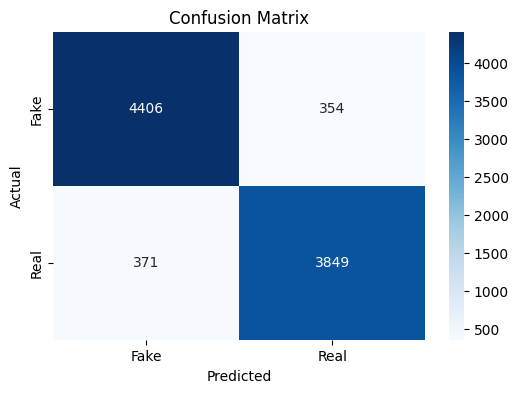

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, "fake_news_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [ ]:
from google.colab import files

files.download("fake_news_model.pkl")
files.download("tfidf_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>